# Prediction of Flight Status in Top 25 Busiest domestic routes of UNITED STATES
## Introduction
### Authored by:
#### Team Name : ELITE
Team Members: Sindhura Alla, Medha Alla, Ravindra Kumar Velidandi, Sai Mithil Sagi, Venkata Saipavan Lahar Sudrosh Kumar Atchutha, Sanjana Thinderu,
### Description of the analysis
In this project, we are using a dataset containing information about flight data from Jan2018- August2022   
Our prediction task is to predict the flight status of the top 25 busiest airports. We are using the input variables OPERATINGAIRLINE, SEASON, DAYOFMONTH, DAYOFWEEK, HOLIDAY, ORIGIN, DESTINATION, DEPTIMEBLK,ARRTIMEBLK, DISTANCEGROUP, DEPDELAYMINUTESHIST7D, CANCELLEDHIST7D, DIVERTEDHIST7D, DEPDELAYMINUTESHIST30D, CANCELLEDHIST30D, DIVERTEDHIST30D.

We are using the following classifiers:
* Decision Tree 
* Random Forest
* AdaBoost
* GradientDescent
* XGBoost.
* MLP classifier
* KNN

we have plotted a correlation plot to understand the relationship between the factors and targett.
The important factor which we are considering for our model is "F1 score". Since the accuracy and precision have an equal importance in our model.The data set is imbalanced so instead of focussing on Accuracy we are considering F1 score.

#### Importing required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from IPython.display import Image
from sklearn.neural_network import MLPClassifier

In [4]:
random_seed = 9
np.random.seed(random_seed)

## Step 2 - Preliminary (Business) Problem Scoping
We are developing a multi classifier models to identify  the flight status

## Step 3 - Loading, cleaning and preparing data

In [5]:
flight_data_df = pd.read_csv('/content/drive/MyDrive/FlightStatus/FilteredColumnsData/BusyRoutesDataFinalPartial.csv')
flight_data_df.head(5)

,OperatingAirline,Season,DayOfMonth,DayOfWeek,Holiday,Origin,OriginCityName,Destination,DestCityName,DepTimeBlk,ArrTimeBlk,DistanceGroup,DepDelayMinutesHist7d,CancelledHist7d,DivertedHist7d,DepDelayMinutesHist30d,CancelledHist30d,DivertedHist30d,FlightStatus
0,9E,Winter,6,Wednesday,False,CLT,"Charlotte, NC",LGA,"New York, NY",0800-0859,1000-1059,3,0.0,0.0,0.0,0.0,0.0,0.0,ShortDelay
1,9E,Winter,7,Thursday,False,CLT,"Charlotte, NC",LGA,"New York, NY",0800-0859,1000-1059,3,0.0,0.0,0.0,0.0,0.0,0.0,ShortDelay
2,9E,Winter,8,Friday,False,CLT,"Charlotte, NC",LGA,"New York, NY",0800-0859,1000-1059,3,0.0,0.0,0.0,0.0,0.0,0.0,ShortDelay
3,9E,Winter,9,Saturday,False,CLT,"Charlotte, NC",LGA,"New York, NY",0800-0859,1000-1059,3,0.0,0.0,0.0,0.0,0.0,0.0,ShortDelay
4,9E,Winter,10,Sunday,False,CLT,"Charlotte, NC",LGA,"New York, NY",0800-0859,1000-1059,3,0.0,0.0,0.0,0.0,0.0,0.0,ShortDelay


### 3.1-Data Exploration

In [6]:
print(flight_data_df.columns)
print(flight_data_df.describe())
print(flight_data_df.info())

Index(['OperatingAirline', 'Season', 'DayOfMonth', 'DayOfWeek', 'Holiday',
       'Origin', 'OriginCityName', 'Destination', 'DestCityName', 'DepTimeBlk',
       'ArrTimeBlk', 'DistanceGroup', 'DepDelayMinutesHist7d',
       'CancelledHist7d', 'DivertedHist7d', 'DepDelayMinutesHist30d',
       'CancelledHist30d', 'DivertedHist30d', 'FlightStatus'],
      dtype='object')
          DayOfMonth  DistanceGroup  DepDelayMinutesHist7d  CancelledHist7d  \
count  247427.000000  247427.000000          247427.000000    247427.000000   
mean       15.750815       3.181771              15.117390         0.024165   
std         8.778895       1.242897              23.057465         0.079366   
min         1.000000       1.000000               0.000000         0.000000   
25%         8.000000       3.000000               1.571429         0.000000   
50%        16.000000       3.000000               7.600000         0.000000   
75%        23.000000       4.000000              20.285714         0.00000

###3.2-Cleaning Column names:

In [7]:
flight_data_df.columns = [col.strip().upper().replace(' ','_') for col in flight_data_df.columns]
flight_data_df.columns

Index(['OPERATINGAIRLINE', 'SEASON', 'DAYOFMONTH', 'DAYOFWEEK', 'HOLIDAY',
       'ORIGIN', 'ORIGINCITYNAME', 'DESTINATION', 'DESTCITYNAME', 'DEPTIMEBLK',
       'ARRTIMEBLK', 'DISTANCEGROUP', 'DEPDELAYMINUTESHIST7D',
       'CANCELLEDHIST7D', 'DIVERTEDHIST7D', 'DEPDELAYMINUTESHIST30D',
       'CANCELLEDHIST30D', 'DIVERTEDHIST30D', 'FLIGHTSTATUS'],
      dtype='object')

In [8]:
routes = {}
for origin in flight_data_df["ORIGIN"].unique():
  routes[origin] = flight_data_df[flight_data_df['ORIGIN'] == origin]['DESTINATION'].unique().tolist()
print(routes)
print(flight_data_df['FLIGHTSTATUS'].unique())

{'CLT': ['LGA', 'ORD', 'EWR', 'MCO', 'ATL'], 'DFW': ['ATL', 'DEN', 'LAX', 'IAH', 'ORD'], 'ORD': ['DCA', 'LAX', 'LGA', 'DEN', 'ATL'], 'DEN': ['PHX', 'SEA', 'LAX', 'SLC', 'LAS'], 'ATL': ['ORD', 'FLL', 'MCO', 'LGA', 'TPA']}
['ShortDelay' 'LongDelay' 'Cancelled']


### 3.3-Dropping Unwanted Columns:

In [9]:
flight_data_df = flight_data_df.drop(columns=['ORIGINCITYNAME','DESTCITYNAME'])

### 3.4-Checking for null values if any:

In [10]:
flight_data_df.isnull().sum()

OPERATINGAIRLINE          0
SEASON                    0
DAYOFMONTH                0
DAYOFWEEK                 0
HOLIDAY                   0
ORIGIN                    0
DESTINATION               0
DEPTIMEBLK                0
ARRTIMEBLK                0
DISTANCEGROUP             0
DEPDELAYMINUTESHIST7D     0
CANCELLEDHIST7D           0
DIVERTEDHIST7D            0
DEPDELAYMINUTESHIST30D    0
CANCELLEDHIST30D          0
DIVERTEDHIST30D           0
FLIGHTSTATUS              0
dtype: int64

### 3.5-Categorizing the category columns:

In [11]:
flight_data_df['OPERATINGAIRLINE'] = flight_data_df['OPERATINGAIRLINE'].astype('category')
flight_data_df['SEASON'] = flight_data_df['SEASON'].astype('category')
flight_data_df['DAYOFMONTH'] = flight_data_df['DAYOFMONTH'].astype('category')
flight_data_df['DAYOFWEEK'] = flight_data_df['DAYOFWEEK'].astype('category')
flight_data_df['ORIGIN'] = flight_data_df['ORIGIN'].astype('category')
flight_data_df['DESTINATION'] = flight_data_df['DESTINATION'].astype('category')
flight_data_df['DISTANCEGROUP'] = flight_data_df['DISTANCEGROUP'].astype('category')
flight_data_df['DEPTIMEBLK'] = flight_data_df['DEPTIMEBLK'].astype('category')
flight_data_df['ARRTIMEBLK'] = flight_data_df['ARRTIMEBLK'].astype('category')
flight_data_df['FLIGHTSTATUS'] = flight_data_df['FLIGHTSTATUS'].astype('category')
flight_data_df.dtypes

OPERATINGAIRLINE          category
SEASON                    category
DAYOFMONTH                category
DAYOFWEEK                 category
HOLIDAY                       bool
ORIGIN                    category
DESTINATION               category
DEPTIMEBLK                category
ARRTIMEBLK                category
DISTANCEGROUP             category
DEPDELAYMINUTESHIST7D      float64
CANCELLEDHIST7D            float64
DIVERTEDHIST7D             float64
DEPDELAYMINUTESHIST30D     float64
CANCELLEDHIST30D           float64
DIVERTEDHIST30D            float64
FLIGHTSTATUS              category
dtype: object

### 3.6-Encoding Category Columns:

In [12]:
LE =LabelEncoder()
flight_data_df['OPERATINGAIRLINE'] = LE.fit_transform(flight_data_df['OPERATINGAIRLINE'])
flight_data_df['SEASON'] = LE.fit_transform(flight_data_df['SEASON'])
flight_data_df['DAYOFMONTH'] = LE.fit_transform(flight_data_df['DAYOFMONTH'])
flight_data_df['DAYOFWEEK'] = LE.fit_transform(flight_data_df['DAYOFWEEK'])
flight_data_df['ORIGIN'] = LE.fit_transform(flight_data_df['ORIGIN'])
flight_data_df['DESTINATION'] = LE.fit_transform(flight_data_df['DESTINATION'])
flight_data_df['DISTANCEGROUP'] = LE.fit_transform(flight_data_df['DISTANCEGROUP'])
flight_data_df['DEPTIMEBLK'] = LE.fit_transform(flight_data_df['DEPTIMEBLK'])
flight_data_df['ARRTIMEBLK'] = LE.fit_transform(flight_data_df['ARRTIMEBLK'])
flight_data_df['FLIGHTSTATUS'] = LE.fit_transform(flight_data_df['FLIGHTSTATUS'])
flight_data_df.head(20)

,OPERATINGAIRLINE,SEASON,DAYOFMONTH,DAYOFWEEK,HOLIDAY,ORIGIN,DESTINATION,DEPTIMEBLK,ARRTIMEBLK,DISTANCEGROUP,DEPDELAYMINUTESHIST7D,CANCELLEDHIST7D,DIVERTEDHIST7D,DEPDELAYMINUTESHIST30D,CANCELLEDHIST30D,DIVERTEDHIST30D,FLIGHTSTATUS
0,0,3,5,6,False,1,8,3,5,2,0.000000,0.0,0.0,0.000000,0.0,0.0,2
1,0,3,6,4,False,1,8,3,5,2,0.000000,0.0,0.0,0.000000,0.0,0.0,2
2,0,3,7,0,False,1,8,3,5,2,0.000000,0.0,0.0,0.000000,0.0,0.0,2
3,0,3,8,2,False,1,8,3,5,2,0.000000,0.0,0.0,0.000000,0.0,0.0,2
4,0,3,9,3,False,1,8,3,5,2,0.000000,0.0,0.0,0.000000,0.0,0.0,2
5,0,3,10,1,False,1,8,3,5,2,0.000000,0.0,0.0,0.000000,0.0,0.0,2
6,0,3,11,5,False,1,8,3,5,2,0.000000,0.0,0.0,0.000000,0.0,0.0,2
7,0,3,12,6,False,1,8,3,5,2,0.000000,0.0,0.0,0.000000,0.0,0.0,2
8,0,3,13,4,False,1,8,3,5,2,0.000000,0.0,0.0,0.000000,0.0,0.0,2
9,0,3,14,0,False,1,8,3,5,2,0.142857,0.0,0.0,0.111111,0.0,0.0,2


## Step 4 - Splitting data into Train and Test sets
#### Creating the training set and the test set with a 70/30 split.
 

In [13]:
# constructing datasets for analysis
target = 'FLIGHTSTATUS'
predictors = list(flight_data_df.columns)
predictors.remove(target)
X = flight_data_df[predictors]
Y = flight_data_df[target]

In [14]:
train_X,test_X, train_Y,test_Y = train_test_split(X,Y, test_size=0.3, random_state=random_seed)

## Step 5 - Training our models using Classifiers

### 5.1 Non Pruned Decision Tree

In [ ]:
classTree = DecisionTreeClassifier(random_state=random_seed)
_ = classTree.fit(train_X, train_Y)

In [ ]:
fig = plt.figure(figsize=(300,60), dpi=100)
_ = plot_tree(classTree, 
                feature_names=flight_data_df.columns,  
                class_names=['Cancelled', 'LongDelay', 'OnTime', 'ShortDelay'],
                fontsize=8
             )

Output hidden; open in https://colab.research.google.com to view.

####  Creating an initial 'wide' range of possible Hyperparameter values for Decision Tree and Random Forest Classifiers.

In [ ]:
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(1, 500, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, 50)]
max_leaf_nodes = [int(x) for x in np.linspace(2, len(test_Y), 50)]
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }


In [16]:
from sklearn.metrics import f1_score, make_scorer
f1micro = make_scorer(f1_score , average='micro')

In [ ]:

dtree_default = DecisionTreeClassifier(random_state=random_seed)
# change n_iter to 200_000 for full run
best_random_dtree_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=random_seed), 
       scoring=f1micro , 
        param_distributions=param_grid_random, 
        n_iter = 1_000,error_score='raise', 
        cv=5,  ##cross validation,K 
        verbose=0, 
        n_jobs = -1
    )
best_random_dtree_model = best_random_dtree_model.fit(train_X, train_Y)

In [ ]:
random_dtree_search_best_params = best_random_dtree_model.best_params_
print('Best parameters found: ', random_dtree_search_best_params)

Best parameters found:  {'min_samples_split': 367, 'min_samples_leaf': 85, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 7576, 'max_depth': 72, 'criterion': 'entropy'}


#### Testing the performance of the selected parameters obtained by RandomizedCV search

In [ ]:
y_pred = best_random_dtree_model.predict(test_X)

print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred,average='weighted')}")
print("************************************")

************************************
F1 Score:         0.8422853601692061
************************************
Accuracy Score:   0.8422853601692061
Recall Score:     0.8422853601692061
Precision Score:  0.7650981076889021
************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### GRID search for best Decision Tree model

In [ ]:
param_grid = { 'min_samples_split': [365,366,367,368],       
              'min_samples_leaf': [83,84,85,86],
              'min_impurity_decrease': [0.009,0.0001,0.002,0.003],
              'max_leaf_nodes':[7575,7576,7577,7578],  
              'max_depth': [70,71,72,73],
              'criterion': ['entropy']
              }

best_tree_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_seed), 
                                    scoring=f1micro, param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
best_tree_grid_search_model = best_tree_grid_search_model.fit(train_X, train_Y)

In [ ]:
print('Best parameters found: ', best_tree_grid_search_model.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 70, 'max_leaf_nodes': 7575, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 83, 'min_samples_split': 365}


#### Testing the performance of the selected parameters obtained by Grid search

In [ ]:
y_pred = best_tree_grid_search_model.predict(test_X)

print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred,average='weighted')}")
print("************************************")

************************************
F1 Score:         0.8422853601692061
************************************
Accuracy Score:   0.8422853601692061
Recall Score:     0.8422853601692061
Precision Score:  0.7650981076889021
************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [ ]:
randomtree_default = RandomForestClassifier(random_state=random_seed)

best_random_forest_model = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=random_seed), 
        scoring=f1micro, 
        param_distributions=param_grid_random, 
        n_iter = 1_000, 
        cv=5, 
        verbose=0, 
        n_jobs = -1,
        random_state=random_seed
    )
best_random_forest_model = best_random_forest_model.fit(train_X, train_Y)

In [ ]:
random_forest_search_best_params = best_random_forest_model.best_params_
print('Best parameters found: ', random_forest_search_best_params)

Best parameters found:  {'min_samples_split': 62, 'min_samples_leaf': 27, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 51506, 'max_depth': 163, 'criterion': 'entropy'}


#### Testing the performance of the selected parameters obtained by Randomized searchCV

In [ ]:
y_pred = best_random_forest_model.predict(test_X)

print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred,average='weighted')}")
print("************************************")

************************************
F1 Score:         0.8434304651820717
************************************
Accuracy Score:   0.8434304651820717
Recall Score:     0.8434304651820717
Precision Score:  0.7831812030859072
************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GRID search for best Random Forest model

In [17]:
param_grid = { 'min_samples_split': [60,61,62,63,64],       
              'min_samples_leaf': [25,26,27,28],
              'min_impurity_decrease': [0.0,0.0001],
              'max_leaf_nodes':[51505,51506,51507,51508],  
              'max_depth': [161,162,163,164,165],
              'criterion': ['entropy']
              }

best_grid_forest_model = GridSearchCV(estimator=RandomForestClassifier(random_state=random_seed), 
                                    scoring=f1micro, param_grid=param_grid, cv=5, verbose=0,  n_jobs = -1)
best_grid_forest_model = best_grid_forest_model.fit(train_X, train_Y)

In [18]:
random_forest_grid_search_best_params = best_grid_forest_model.best_params_
print('Best parameters found: ', random_forest_grid_search_best_params)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 161, 'max_leaf_nodes': 51505, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 25, 'min_samples_split': 61}


#####  Testing the performance of the random forest selected parameters obtained by Grid search

In [22]:
y_pred = best_grid_forest_model.predict(test_X)
print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred,average='weighted')}")
print("************************************")

************************************
F1 Score:         0.8434035215347101
************************************
Accuracy Score:   0.8434035215347101
Recall Score:     0.8434035215347101
Precision Score:  0.7824074289549792
************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ADABoost using RandomizedsearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(1, 100, 25)]
learning_rate = [float(x) for x in np.linspace(1, 10, 10)]
param_grid_Adaboost = { 'n_estimators': n_estimators,
                      'learning_rate': learning_rate,
                     }
Adaboost_default = AdaBoostClassifier(random_state=random_seed)

best_random_adaboost_model = RandomizedSearchCV(
        estimator=AdaBoostClassifier(random_state=random_seed), 
        scoring=f1micro, 
        param_distributions=param_grid_Adaboost, 
        n_iter = 5_000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1,
        random_state=random_seed
    )
best_random_adaboost_model = best_random_adaboost_model.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 250 is smaller than n_iter=5000. Running 250 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
random_search_best_ada_params = best_random_adaboost_model.best_params_
print('Best parameters found: ', random_search_best_ada_params)

Best parameters found:  {'n_estimators': 91, 'learning_rate': 1.0}


##### Testing the performance of the ADABOOST selected parametres obtained by Randomized searchCV

In [ ]:
y_pred = best_random_adaboost_model.predict(test_X)

print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred,average='weighted')}")
print("************************************")

************************************
F1 Score:         0.8428107612927562
************************************
Accuracy Score:   0.8428107612927562
Recall Score:     0.8428107612927562
Precision Score:  0.7872721430714816
************************************


#### Grid search for ADA BOOST best model

In [ ]:
param_grid = {'n_estimators': [90,91,92,93],       
              'learning_rate': [0.99,1,0.98,1.1,1.2,0.97]}
grid_adaboostmodel = GridSearchCV(estimator=AdaBoostClassifier(random_state=random_seed),
                                   scoring=f1micro, param_grid=param_grid, cv=5, verbose=0,  n_jobs = -1)
grid_adaboostmodel = grid_adaboostmodel.fit(train_X, train_Y)

In [ ]:
grid_adaboost_best_params = grid_adaboostmodel.best_params_
print('Best parameters found: ', grid_adaboost_best_params)

Best parameters found:  {'learning_rate': 0.99, 'n_estimators': 90}


##### Testing the performance of the ADABOOST selected parametres obtained by GridsearchCV

In [ ]:
y_pred = grid_adaboostmodel.predict(test_X)

print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred,average='weighted')}")
print("************************************")

************************************
F1 Score:         0.8428377049401178
************************************
Accuracy Score:   0.8428377049401178
Recall Score:     0.8428377049401178
Precision Score:  0.7902650471965813
************************************


#### Gradiant Boosting

In [ ]:
n_estimators = [int(x) for x in np.linspace(1, 100, 5)]
learning_rate = [float(x) for x in np.linspace(1, 10, 1)]
max_depth = [int(x) for x in np.linspace(1, 500, 5)]
param_grid_gradiant = { 'n_estimators': n_estimators,
                      'learning_rate': learning_rate,
                      'max_depth':max_depth
                     }
best_random_gradiant_model = RandomizedSearchCV(
        estimator=GradientBoostingClassifier(random_state=random_seed), 
        scoring= f1micro, 
        param_distributions=param_grid_gradiant, 
        n_iter = 1_000, 
        cv=2, 
        verbose=0, 
        n_jobs = -1,
        random_state=random_seed
    )
best_random_gradiant_model = best_random_gradiant_model.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 25 is smaller than n_iter=1000. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
random_search_best_gradiant_params = best_random_gradiant_model.best_params_
print('Best parameters found: ', random_search_best_gradiant_params)

Best parameters found:  {'n_estimators': 100, 'max_depth': 1, 'learning_rate': 1.0}


##### Testing the performance of the Gradiant boost selected parametres obtained by Randomized searchCV

In [ ]:
y_pred = best_random_gradiant_model.predict(test_X)

print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred,average='weighted')}")
print("************************************")

************************************
F1 Score:         0.8429454795295639
************************************
Accuracy Score:   0.8429454795295639
Recall Score:     0.8429454795295639
Precision Score:  0.7817784948506826
************************************


### Grid Search for Gradiant Boost

In [ ]:
param_grid = {'n_estimators': [98,99,100,101],       
              'learning_rate': [1.0,0.09,0.08,1.1], 
              'max_depth': [1,2,3]
              }
              
best_grid_gradiant_model = GridSearchCV(estimator=GradientBoostingClassifier(random_state=random_seed), 
                                    scoring=f1micro, param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
best_grid_gradiant_model = best_grid_gradiant_model.fit(train_X, train_Y)

In [ ]:
grid_gradiant_best_params = best_grid_gradiant_model .best_params_
print('Best parameters found: ', grid_gradiant_best_params)

Best parameters found:  {'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 99}


##### Testing the performance of the Gradiant boost selected parametres obtained by GridSearch CV

In [ ]:
y_pred = best_grid_gradiant_model.predict(test_X)

print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred,average='weighted')}")
print("************************************")

************************************
F1 Score:         0.843174500532137
************************************
Accuracy Score:   0.843174500532137
Recall Score:     0.843174500532137
Precision Score:  0.7865937801617134
************************************


##### XGBoost

In [ ]:
n_estimators=[int(x) for x in np.linspace(1, 500, 5)]
min_child_weight=[4,5]
gamma=[i/10.0 for i in range(3,6)]
subsample=[i/10.0 for i in range(6,11)]
colsample_bytree = [i/10.0 for i in range(6,11)]
max_depth= [int(x) for x in np.linspace(1, 500, 50)]
objective= ['reg:squarederror', 'reg:tweedie']
booster= ['gbtree', 'gblinear']
eval_metric= ['rmse']
eta= [i/10.0 for i in range(3,6)]
param_grid_random = {
    'n_estimators':n_estimators,
    'min_child_weight':min_child_weight, 
    'gamma':gamma,  
    'subsample':subsample,
    'colsample_bytree':colsample_bytree, 
    'max_depth': max_depth,
    'objective': objective,
    'booster': booster,
    'eval_metric': eval_metric,
    'eta': eta,
}

In [ ]:
XGB_C = XGBClassifier(random_state=random_seed)
best_random_XGB_model = RandomizedSearchCV(
        estimator= XGB_C, 
        scoring=f1micro, 
        param_distributions=param_grid_random, 
        n_iter = 10, 
        cv=5, 
        verbose=0, 
        n_jobs = -1, 
        random_state=random_seed
    )
best_random_XGB_model = best_random_XGB_model.fit(train_X.values, train_Y.values)

In [ ]:
best_random_search_xgb_params = best_random_XGB_model.best_params_
print('Best parameters found: ', best_random_search_xgb_params)

Best parameters found:  {'subsample': 0.9, 'objective': 'reg:tweedie', 'n_estimators': 1, 'min_child_weight': 4, 'max_depth': 357, 'gamma': 0.3, 'eval_metric': 'rmse', 'eta': 0.5, 'colsample_bytree': 0.8, 'booster': 'gblinear'}


##### Testing the performance of the Gradiant boost selected parametres obtained by Randomized searchCV

In [ ]:
y_pred = best_random_XGB_model.predict(test_X.values)

print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred,average='weighted')}")
print("************************************")

************************************
F1 Score:         0.8426895148796293
************************************
Accuracy Score:   0.8426895148796293
Recall Score:     0.8426895148796293
Precision Score:  0.7101256184880649
************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



### Grid Search

In [ ]:
param_grid = {
              'n_estimators': [1,2,3],       
              'min_child_weight': [3,4],
              'max_depth': [356,357],
              'gamma': [0.2,0.3],
              'eval_metric': ['rmse'],
              'eta': [0.5],
              'colsample_bytree': [0.8,0.9],
              'booster': ['gblinear'],
              'subsample': [0.9],
              'objective': ['reg:tweedie'],
              }
              
best_grid_xgb_model = GridSearchCV(estimator=XGBClassifier(random_state=random_seed), 
                                  scoring=f1micro, param_grid=param_grid, cv=5, verbose=0, n_jobs = -1)


In [ ]:
best_grid_xgb_model = best_grid_xgb_model.fit(train_X.values, train_Y.values)

### Testing the performance of selected parametres by GridsearchCV

In [ ]:
y_pred = best_grid_xgb_model.predict(test_X.values)

print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred,average='weighted')}")
print("************************************")

************************************
F1 Score:         0.8426895148796293
************************************
Accuracy Score:   0.8426895148796293
Recall Score:     0.8426895148796293
Precision Score:  0.7101256184880649
************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Neural Networks

In [ ]:
%%time

an1 = MLPClassifier(hidden_layer_sizes=(20,10,5), solver='adam', max_iter=1000)
N1  = an1.fit(train_X, train_Y)

CPU times: user 1min 9s, sys: 31.2 ms, total: 1min 9s
Wall time: 1min 9s


In [ ]:
%%time

y_pred_m1 = N1.predict(test_X)

CPU times: user 640 ms, sys: 2.02 s, total: 2.66 s
Wall time: 138 ms


In [ ]:
print('********Neural Model-1*********')
print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred_m1,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred_m1)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred_m1,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred_m1,average='weighted')}")
print("************************************")

********Neural Model-1*********
************************************
F1 Score:         0.8428781204111602
************************************
Accuracy Score:   0.8428781204111601
Recall Score:     0.8428781204111601
Precision Score:  0.7811475231530369
************************************


In [ ]:
%%time

an2 = MLPClassifier(hidden_layer_sizes=(500,250,150,250,50,10), solver='adam', max_iter=1000)
N2  = an1.fit(train_X, train_Y)

CPU times: user 1min 17s, sys: 37.1 ms, total: 1min 17s
Wall time: 1min 17s


In [ ]:
y_pred_m1 = N2.predict(test_X)

In [ ]:
print('********Neural Model-2*********')
print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, y_pred_m1,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, y_pred_m1)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, y_pred_m1,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, y_pred_m1,average='weighted')}")
print("************************************")

********Neural Model-2*********
************************************
F1 Score:         0.8426895148796293
************************************
Accuracy Score:   0.8426895148796293
Recall Score:     0.8426895148796293
Precision Score:  0.7765966416364858
************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNearest Neighbours

In [ ]:
n_neighbors = [int(x) for x in np.linspace(1,20,5)]
weights = ['uniform','distance']
metric = ['euclidean','manhattan','chebyshev','seuclidean','minkowski'] 
p = [int(x) for x in np.linspace(1,10,5)]
leaf_size = [int(x) for x in np.linspace(1,20,5)]

random_grid_knn = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric,
    'p':p,
    'leaf_size': leaf_size
}


In [ ]:
knn = KNeighborsClassifier() 
knn_random = RandomizedSearchCV(estimator = knn, 
                                random_state = random_seed,
                                n_jobs = -1,
                                param_distributions = random_grid_knn,
                                n_iter = 5,
                                cv=3,
                                verbose = 2)
knn_random.fit(train_X, train_Y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'leaf_size': [1, 5, 10, 15, 20],
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'seuclidean',
                                                   'minkowski'],
                                        'n_neighbors': [1, 5, 10, 15, 20],
                                        'p': [1, 3, 5, 7, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=9, verbose=2)

In [ ]:
random_search_best_params_knn = knn_random.best_params_
print('Best parameters found: ', random_search_best_params_knn)

Best parameters found:  {'weights': 'uniform', 'p': 10, 'n_neighbors': 20, 'metric': 'manhattan', 'leaf_size': 5}


In [ ]:
validation_predictions = knn_random.predict(test_X)

In [ ]:
print('********KNN*********')
print("************************************")
print(f"{'F1 Score: ':18}{f1_score(test_Y, validation_predictions,average='micro')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_Y, validation_predictions)}")
print(f"{'Recall Score:':18}{recall_score(test_Y, validation_predictions,average='weighted')}")
print(f"{'Precision Score: ':18}{precision_score(test_Y, validation_predictions,average='weighted')}")
print("************************************")

********KNN*********
************************************
F1 Score:         0.840345417559175
************************************
Accuracy Score:   0.840345417559175
Recall Score:     0.840345417559175
Precision Score:  0.7773826467776421
************************************


### Correlation Plot

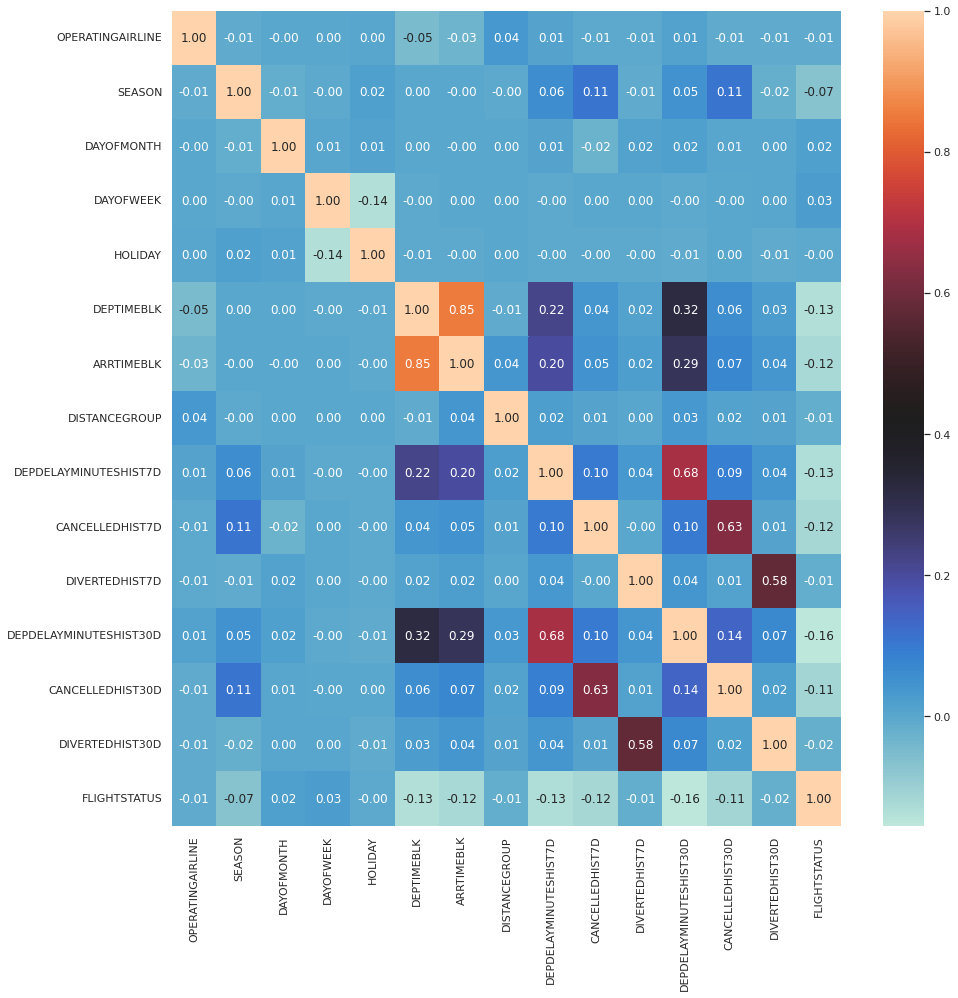

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df= flight_data_df.drop(columns=['ORIGIN','DESTINATION'])
sns.set_theme(style="darkgrid")

# Compute the correlation matrix
corr = corr_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.heatmap(corr, annot=True, fmt=".2f", cmap='icefire')